In [1]:
library(astsa)

lansa <- read.csv("LANSAhousing.csv")

lansa$observation_date <- as.Date(lansa$observation_date, format="%Y-%m-%d")
lansa <- ts(lansa$LXXRNSA, start=c(1987,1), frequency=12)

head(lansa)

[1] 59.33084 59.64560 59.98617 60.80571 61.67085 62.70770

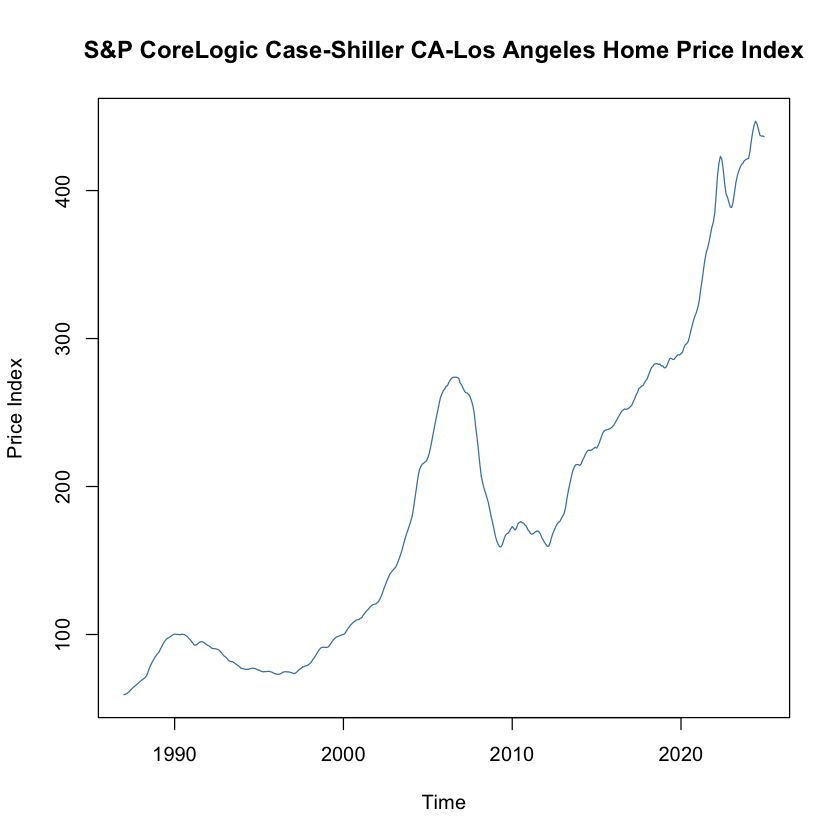

In [21]:
par(bg = "white")
plot(lansa, xlab = "Time", ylab = "Price Index", main = "S&P CoreLogic Case-Shiller CA-Los Angeles Home Price Index", col = "steelblue")

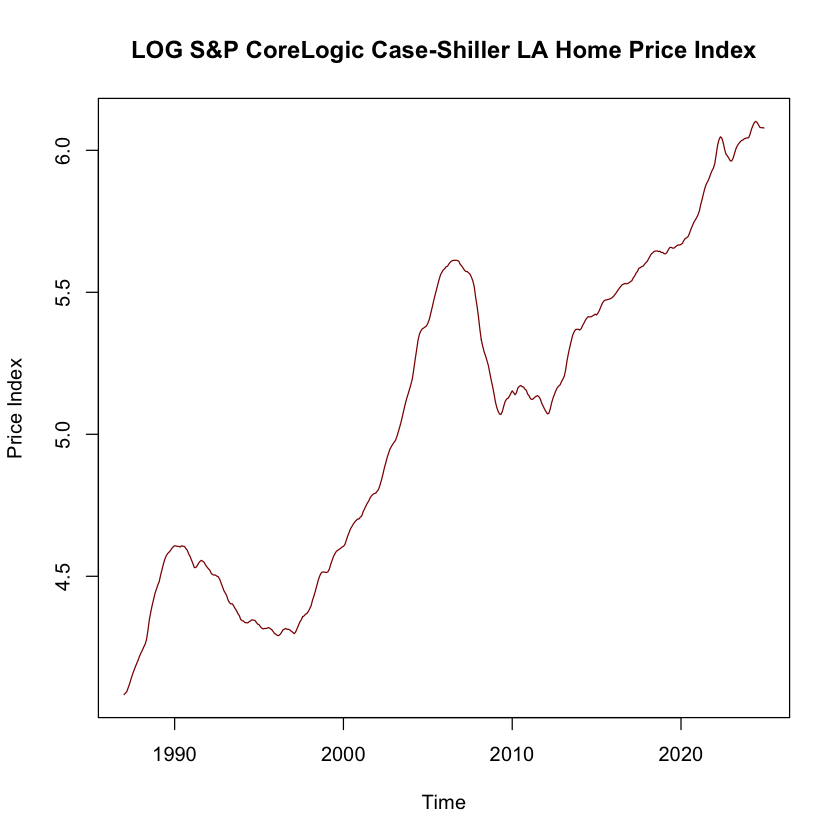

In [23]:
loglansa <- log(lansa)

par(bg = "white")
plot(loglansa,
     xlab = "Time",
     ylab = "Price Index",
     main = "LOG S&P CoreLogic Case-Shiller LA Home Price Index",
     col = "darkred"
     )

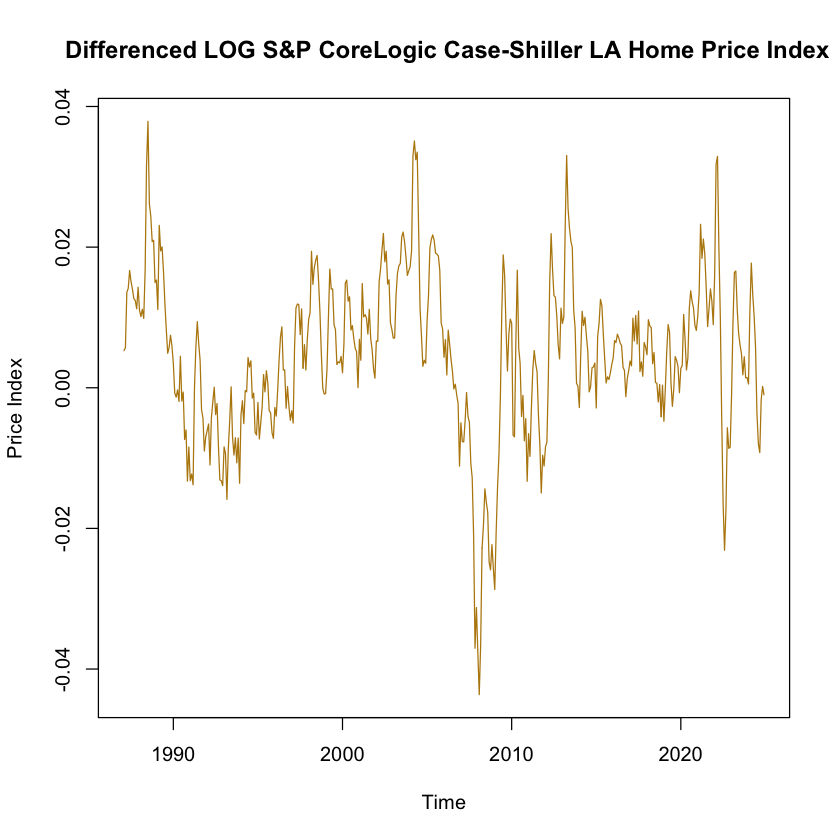

In [3]:
dlansa <- diff(log(lansa))

par(bg = "white")
plot(dlansa,
     xlab = "Time",
     ylab = "Price Index",
     main = " Differenced LOG S&P CoreLogic Case-Shiller LA Home Price Index",
     col = "darkgoldenrod"
     )

In [5]:
loglansa <- log(lansa)

logflansa <- diff(diff(loglansa, lag = 12, differences = 1))

flansa <- diff(diff(lansa, lag = 12, differences = 1))

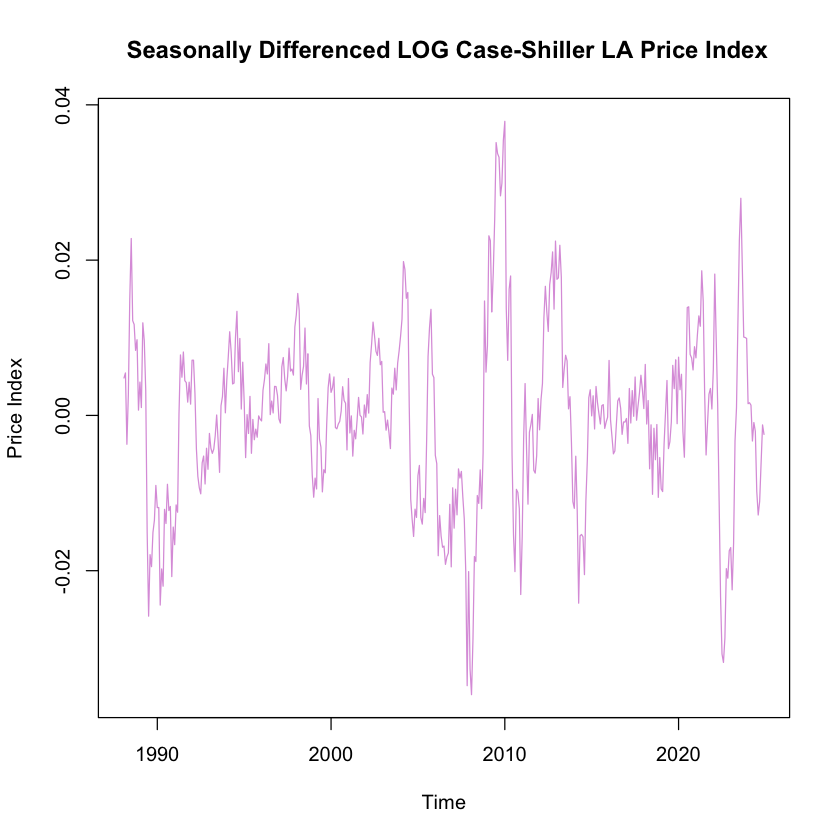

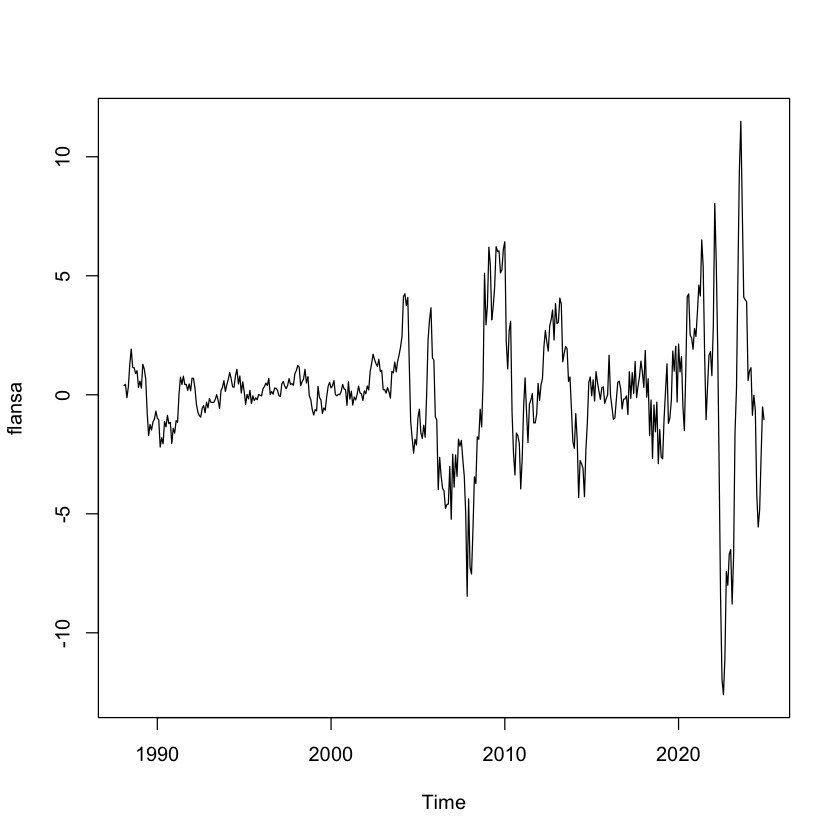

In [26]:
par(bg = "white")
plot(logflansa,
     xlab = "Time",
     ylab = "Price Index",
     main = " Seasonally Differenced LOG Case-Shiller LA Price Index",
     col = "plum"
     )
plot(flansa)

ACF,0.87,0.75,0.63,0.56,0.44,0.34,0.24,0.17,0.10,0.01,⋯,0.11,0.11,0.1,0.09,0.06,0.05,0.03,0.00,-0.02,-0.04
PACF,0.87,-0.02,-0.09,0.14,-0.24,-0.02,0.00,-0.07,0.02,-0.18,⋯,-0.05,0.05,0.0,-0.07,-0.03,-0.01,0.02,-0.12,0.00,-0.08


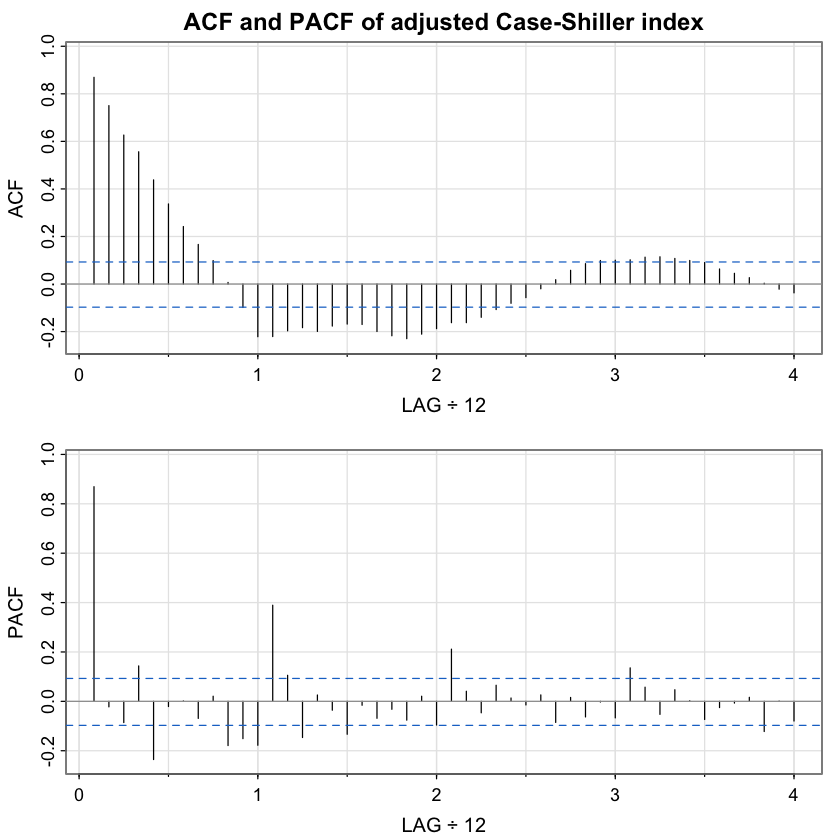

In [27]:
par(bg = "white")
acf2(logflansa, main = "ACF and PACF of adjusted Case-Shiller index")

The intial model I would use for this is (1,1,0)x(0,1,1).
The ACF tails off while there is clear cutoff after lag 1 in PACF.
There are lag spikes at 12,24,36 in ACF which tells me there is a SMA term. There are spikes in PACF but they aren't at 12,24,36 so we won't add an SAR term for now.

initial  value -4.474656 
iter   2 value -5.268897
iter   3 value -5.287482
iter   4 value -5.339446
iter   5 value -5.375383
iter   6 value -5.389850
iter   7 value -5.396704
iter   8 value -5.397930
iter   9 value -5.398222
iter  10 value -5.398234
iter  10 value -5.398234
iter  10 value -5.398234
final  value -5.398234 
converged
initial  value -5.393290 
iter   2 value -5.393312
iter   3 value -5.393320
iter   4 value -5.393324
iter   5 value -5.393328
iter   6 value -5.393329
iter   6 value -5.393329
final  value -5.393329 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1    0.9178 0.0189  48.4650       0
sma1  -0.7915 0.0395 -20.0249       0

sigma^2 estimated as 2.007569e-05 on 441 degrees of freedom 
 
AIC = -7.935236  AICc = -7.935175  BIC = -7.907514 
 


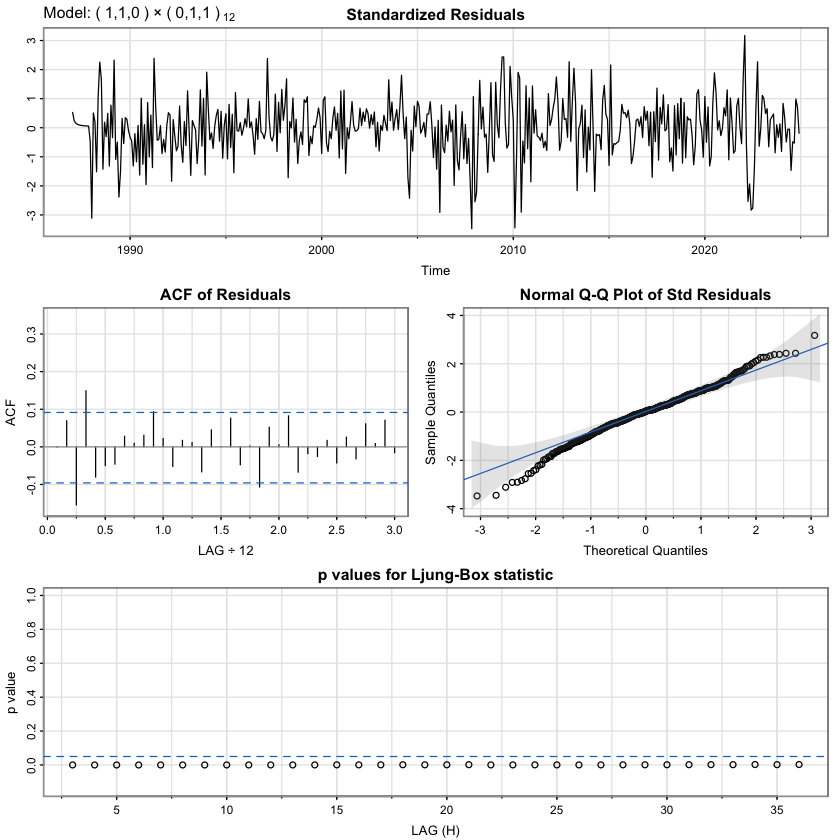

In [8]:
par(bg = "white")
sarima(loglansa,
       p = 1,
       d = 1,
       q = 0,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

This model is clearly underfit. The coefficients are significant but residuals ae not acting like white noise according to the Ljung-Box statistics. I will add AR terms and see if that helps.

initial  value -4.472537 
iter   2 value -4.887792
iter   3 value -5.032749
iter   4 value -5.301075
iter   5 value -5.345279
iter   6 value -5.372331
iter   7 value -5.400242
iter   8 value -5.407368
iter   9 value -5.410487
iter  10 value -5.410855
iter  11 value -5.410896
iter  12 value -5.410897
iter  13 value -5.410898
iter  13 value -5.410898
iter  13 value -5.410898
final  value -5.410898 
converged
initial  value -5.419943 
iter   2 value -5.422882
iter   3 value -5.423062
iter   4 value -5.423067
iter   5 value -5.423067
iter   6 value -5.423067
iter   6 value -5.423067
iter   6 value -5.423068
final  value -5.423068 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1    0.9515 0.0471  20.1857  0.0000
ar2    0.0294 0.0638   0.4611  0.6449
ar3   -0.2259 0.0628  -3.6002  0.0004
ar4    0.3141 0.0638   4.9254  0.0000
ar5   -0.1540 0.0474  -3.2468  0.0013
sma1  -0.7728 0.0420 -18.3849  0.0000

sigma^2 estimated as 1.893955e-05 on 437 d

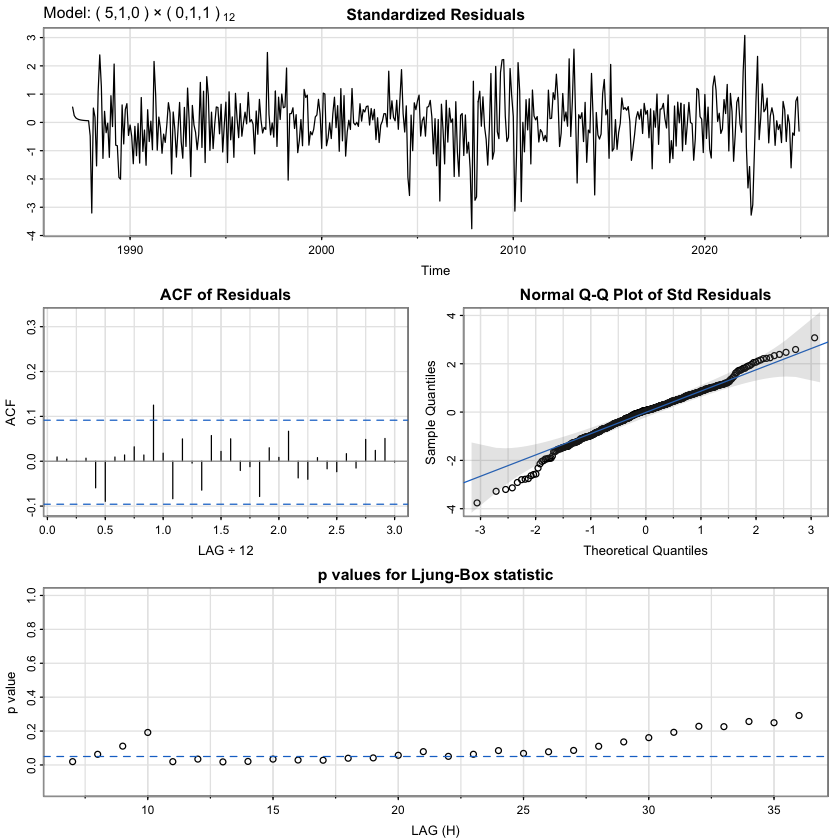

In [9]:
par(bg = "white")
sarima(loglansa,
       p = 5,
       d = 1,
       q = 0,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

This model is better but not perfect. I will add an MA term and see if that helps.

initial  value -4.472537 
iter   2 value -4.990641
iter   3 value -5.205314
iter   4 value -5.263859
iter   5 value -5.326081
iter   6 value -5.383372
iter   7 value -5.402870
iter   8 value -5.404554
iter   9 value -5.405259
iter  10 value -5.405945
iter  11 value -5.408324
iter  12 value -5.409926
iter  13 value -5.411110
iter  14 value -5.411344
iter  15 value -5.411458
iter  16 value -5.411466
iter  17 value -5.411466
iter  18 value -5.411467
iter  19 value -5.411467
iter  19 value -5.411467
iter  19 value -5.411467
final  value -5.411467 
converged
initial  value -5.420578 
iter   2 value -5.423233
iter   3 value -5.423477
iter   4 value -5.423528
iter   5 value -5.423535
iter   6 value -5.423536
iter   7 value -5.423539
iter   8 value -5.423543
iter   9 value -5.423550
iter  10 value -5.423554
iter  11 value -5.423555
iter  12 value -5.423556
iter  13 value -5.423556
iter  13 value -5.423556
iter  13 value -5.423556
final  value -5.423556 
converged
<><><><><><><><><><><><><><>
 

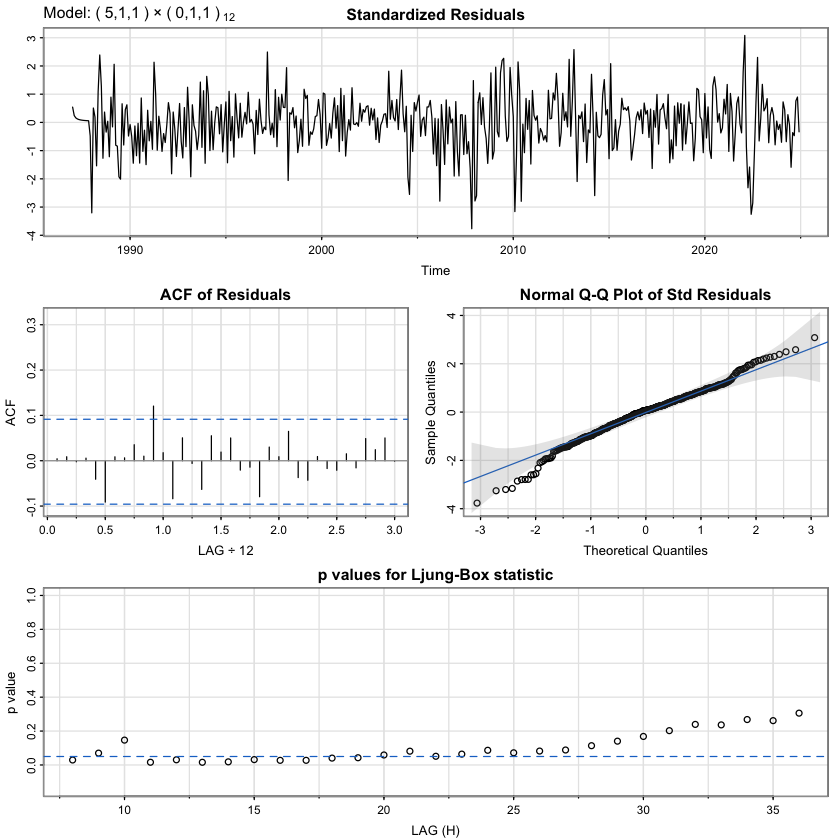

In [10]:
par(bg = "white")
sarima(loglansa,
       p = 5,
       d = 1,
       q = 1,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

This MA term was not helpful as the coefficiant is not significant.

initial  value -4.474656 
iter   2 value -4.769291
iter   3 value -5.160169
iter   4 value -5.312918
iter   5 value -5.359810
iter   6 value -5.380580
iter   7 value -5.386538
iter   8 value -5.396793
iter   9 value -5.397633
iter  10 value -5.398200
iter  11 value -5.398238
iter  12 value -5.398246
iter  13 value -5.398246
iter  13 value -5.398246
iter  13 value -5.398246
final  value -5.398246 
converged
initial  value -5.393292 
iter   2 value -5.393314
iter   3 value -5.393323
iter   4 value -5.393327
iter   5 value -5.393333
iter   6 value -5.393334
iter   7 value -5.393334
iter   7 value -5.393334
iter   7 value -5.393334
final  value -5.393334 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1    0.9183 0.0203  45.2035  0.0000
ma1   -0.0033 0.0483  -0.0675  0.9462
sma1  -0.7913 0.0399 -19.8409  0.0000

sigma^2 estimated as 2.007626e-05 on 440 degrees of freedom 
 
AIC = -7.930732  AICc = -7.930608  BIC = -7.89377 
 


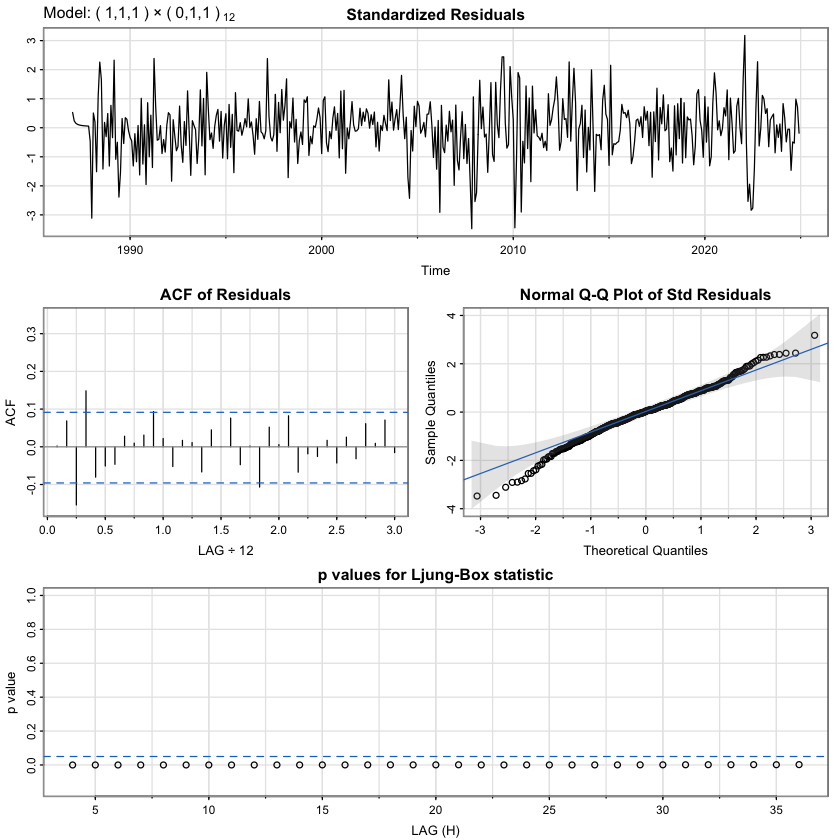

In [11]:
par(bg = "white")
sarima(loglansa,
       p = 1,
       d = 1,
       q = 1,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

Perhaps we can add a seasonal AR term to see if that helps with the lag spikes.

initial  value -4.471647 
iter   2 value -4.908834
iter   3 value -4.989827
iter   4 value -5.296328
iter   5 value -5.352316
iter   6 value -5.387473
iter   7 value -5.399791
iter   8 value -5.407573
iter   9 value -5.409907
iter  10 value -5.410295
iter  11 value -5.410448
iter  12 value -5.410453
iter  13 value -5.410454
iter  13 value -5.410454
iter  13 value -5.410454
final  value -5.410454 
converged
initial  value -5.416485 
iter   2 value -5.419598
iter   3 value -5.423102
iter   4 value -5.424458
iter   5 value -5.424519
iter   6 value -5.424533
iter   7 value -5.424549
iter   8 value -5.424555
iter   9 value -5.424556
iter   9 value -5.424556
iter   9 value -5.424556
final  value -5.424556 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1    0.9562 0.0473  20.2330  0.0000
ar2    0.0172 0.0646   0.2662  0.7902
ar3   -0.2239 0.0629  -3.5570  0.0004
ar4    0.3170 0.0639   4.9573  0.0000
ar5   -0.1574 0.0475  -3.3119  0.0010
sar1  

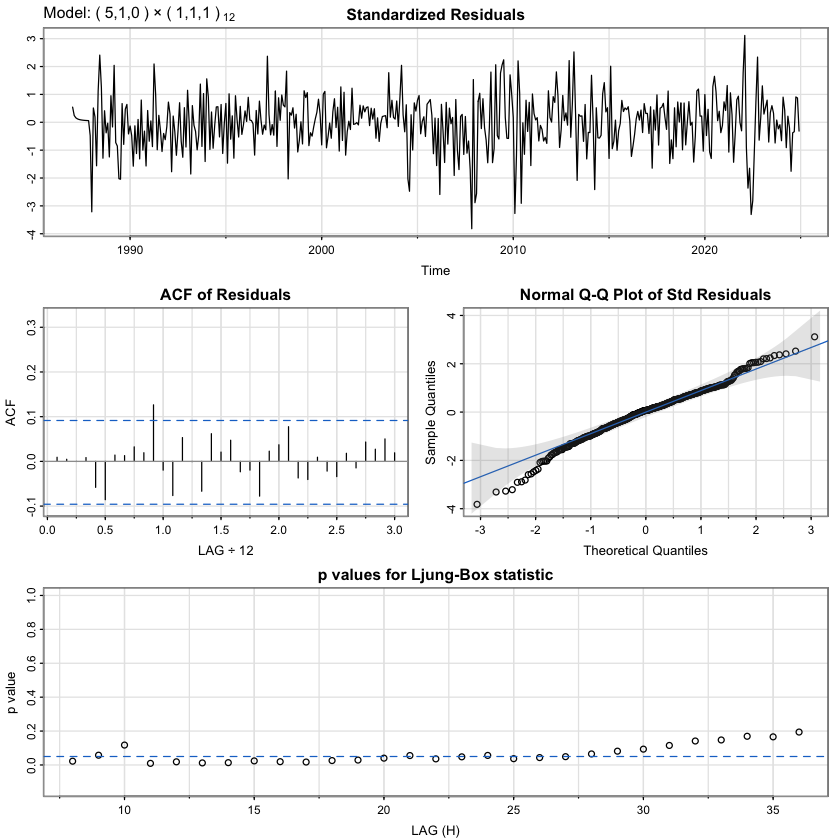

In [12]:
par(bg = "white")
sarima(loglansa,
       p = 5,
       d = 1,
       q = 0,
       P = 1,
       D = 1,
       Q = 1,
       S = 12)

I suppose the SAR term is not needed.

initial  value -4.471694 
iter   2 value -4.880833
iter   3 value -5.023020
iter   4 value -5.176044
iter   5 value -5.358441
iter   6 value -5.359411
iter   7 value -5.398569
iter   8 value -5.405970
iter   9 value -5.410988
iter  10 value -5.411991
iter  11 value -5.412042
iter  12 value -5.412050
iter  13 value -5.412050
iter  14 value -5.412051
iter  15 value -5.412051
iter  15 value -5.412051
iter  15 value -5.412051
final  value -5.412051 
converged
initial  value -5.411120 
iter   2 value -5.411285
iter   3 value -5.411306
iter   4 value -5.411307
iter   5 value -5.411308
iter   6 value -5.411308
iter   7 value -5.411309
iter   7 value -5.411309
iter   7 value -5.411309
final  value -5.411309 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1    0.9288 0.0472  19.6609  0.0000
ar2    0.0625 0.0639   0.9771  0.3291
ar3   -0.2358 0.0635  -3.7141  0.0002
ar4    0.1716 0.0469   3.6567  0.0003
sma1  -0.7914 0.0405 -19.5392  0.0000

sigma

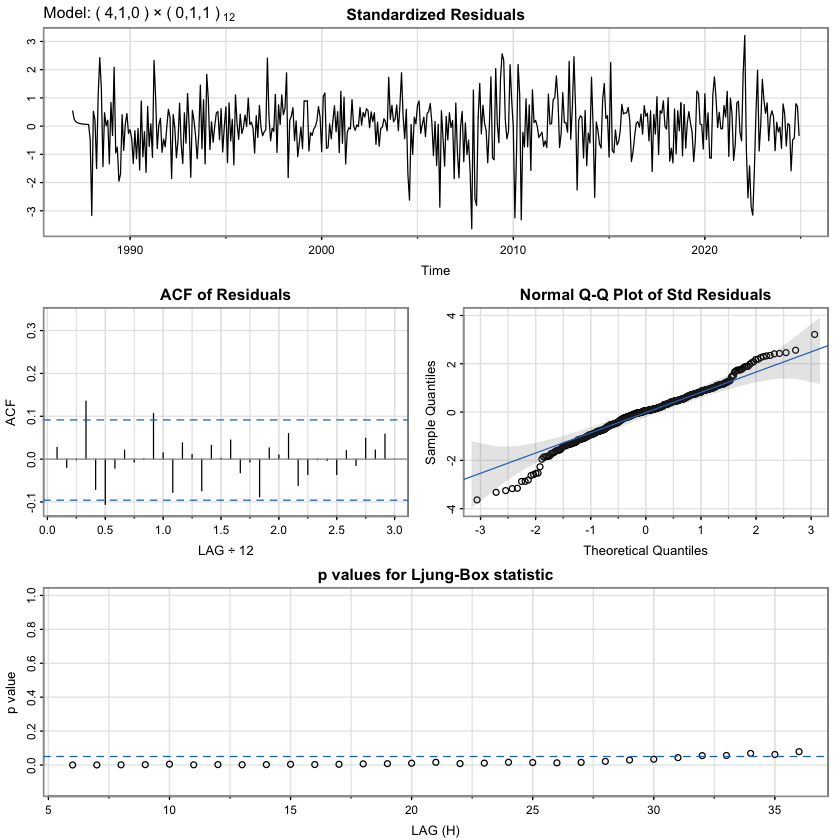

In [13]:
par(bg = "white")
sarima(loglansa,
       p = 4,
       d = 1,
       q = 0,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

initial  value -4.475584 
iter   2 value -4.729840
iter   3 value -4.753055
iter   4 value -4.836084
iter   5 value -4.865005
iter   6 value -4.876284
iter   7 value -4.888130
iter   8 value -4.888153
iter   9 value -4.888158
iter  10 value -4.888159
iter  10 value -4.888159
iter  10 value -4.888159
final  value -4.888159 
converged
initial  value -4.884514 
iter   2 value -4.884684
iter   3 value -4.884728
iter   4 value -4.884751
iter   5 value -4.884751
iter   5 value -4.884751
iter   5 value -4.884751
final  value -4.884751 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE t.value p.value
ma1    0.6679 0.0253 26.4281       0
sma1  -0.4911 0.0657 -7.4756       0

sigma^2 estimated as 5.666649e-05 on 441 degrees of freedom 
 
AIC = -6.918081  AICc = -6.918019  BIC = -6.890359 
 


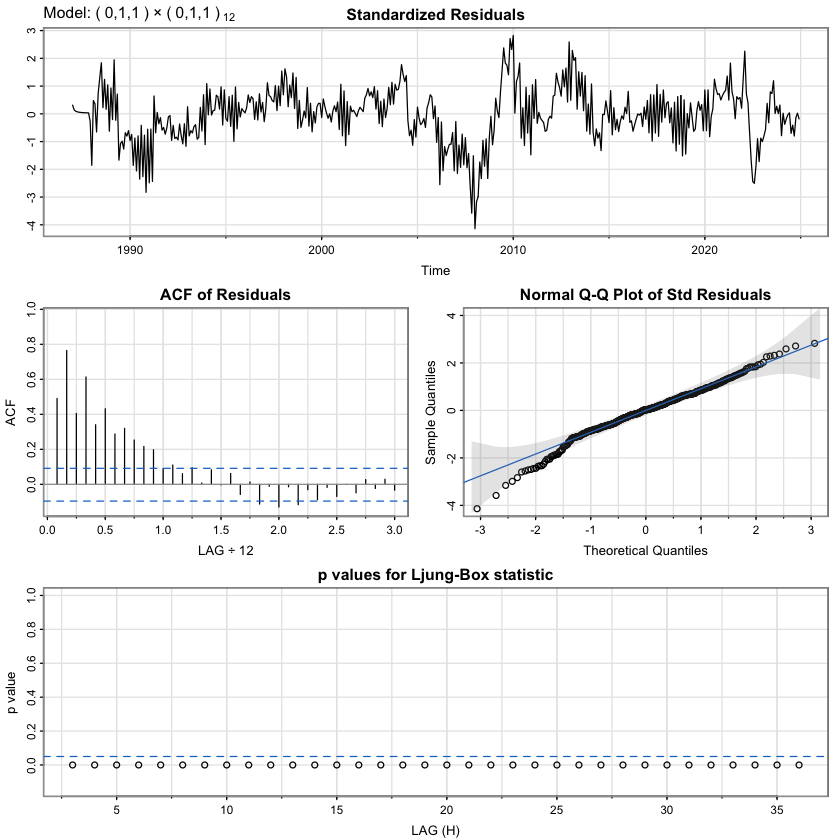

In [14]:
par(bg = "white")
sarima(loglansa,
       p = 0,
       d = 1,
       q = 1,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

initial  value -4.475584 
iter   2 value -5.128002
iter   3 value -5.164178
iter   4 value -5.171256
iter   5 value -5.176717
iter   6 value -5.176892
iter   7 value -5.176948
iter   8 value -5.176950
iter   9 value -5.176951
iter  10 value -5.176951
iter  10 value -5.176951
iter  10 value -5.176951
final  value -5.176951 
converged
initial  value -5.171069 
iter   2 value -5.171185
iter   3 value -5.171222
iter   4 value -5.171282
iter   5 value -5.171284
iter   6 value -5.171284
iter   6 value -5.171284
iter   6 value -5.171284
final  value -5.171284 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE t.value p.value
ma1    0.9682 0.0531 18.2478       0
ma2    0.6446 0.0295 21.8402       0
sma1  -0.6154 0.0751 -8.1921       0

sigma^2 estimated as 3.171026e-05 on 440 degrees of freedom 
 
AIC = -7.486632  AICc = -7.486509  BIC = -7.44967 
 


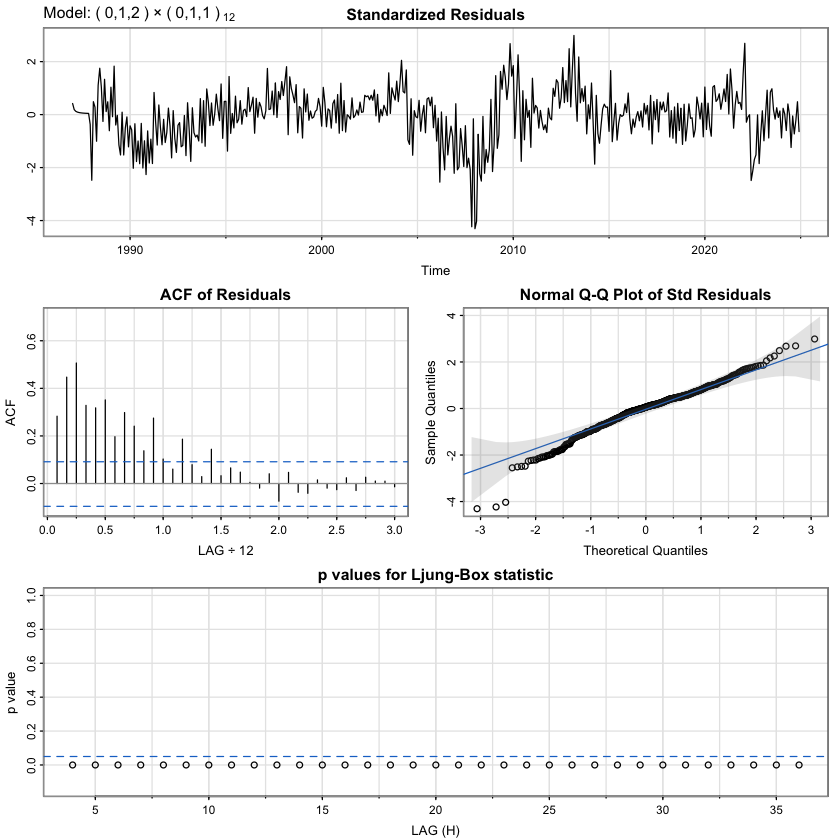

In [15]:
par(bg = "white")
sarima(loglansa,
       p = 0,
       d = 1,
       q = 2,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

initial  value -4.475584 
iter   2 value -5.044726
iter   3 value -5.081538
iter   4 value -5.204956
iter   5 value -5.222809
iter   6 value -5.239605
iter   7 value -5.243614
iter   8 value -5.244689
iter   9 value -5.244819
iter  10 value -5.244844
iter  10 value -5.244845
final  value -5.244845 
converged
initial  value -5.239248 
iter   2 value -5.239299
iter   3 value -5.239331
iter   4 value -5.239373
iter   5 value -5.239433
iter   6 value -5.239444
iter   7 value -5.239453
iter   7 value -5.239453
iter   7 value -5.239453
final  value -5.239453 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE t.value p.value
ma1    1.1152 0.0446 25.0004       0
ma2    0.9315 0.0509 18.3090       0
ma3    0.3037 0.0394  7.7088       0
sma1  -0.8030 0.1191 -6.7392       0

sigma^2 estimated as 2.723489e-05 on 439 degrees of freedom 
 
AIC = -7.618456  AICc = -7.618249  BIC = -7.572253 
 


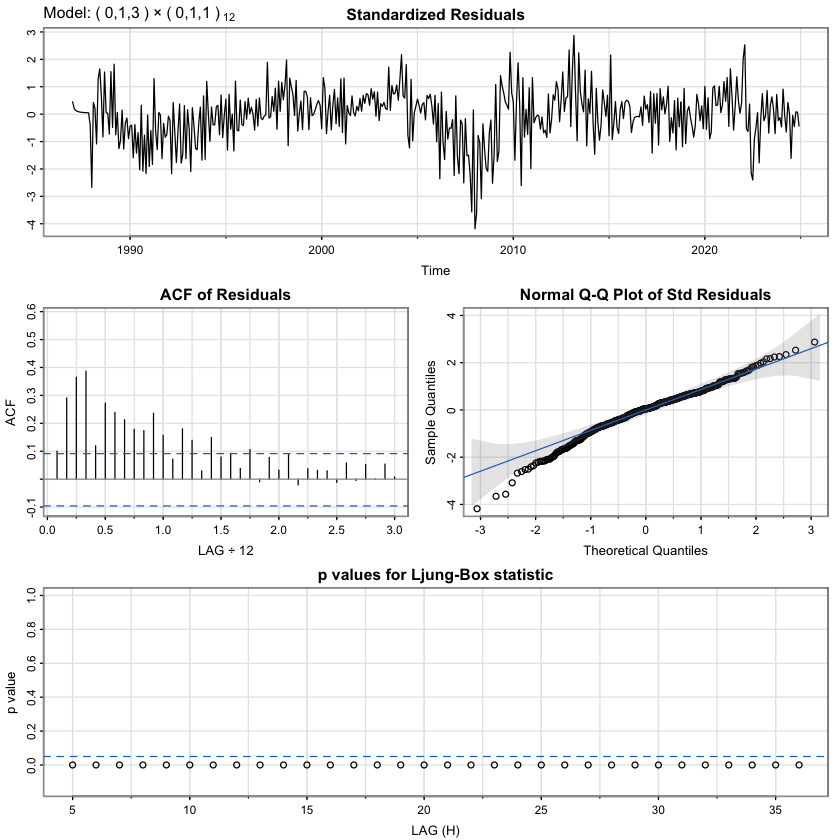

In [16]:
par(bg = "white")
sarima(loglansa,
       p = 0,
       d = 1,
       q = 3,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

initial  value -4.472537 
iter   2 value -4.475426
iter   3 value -4.544886
iter   4 value -5.107890
iter   5 value -5.113506
iter   6 value -5.336877
iter   7 value -5.369188
iter   8 value -5.385153
iter   9 value -5.386884
iter  10 value -5.389483
iter  11 value -5.390821
iter  12 value -5.394188
iter  13 value -5.399976
iter  14 value -5.403735
iter  15 value -5.403980
iter  16 value -5.405648
iter  17 value -5.406517
iter  18 value -5.408327
iter  19 value -5.409223
iter  20 value -5.410475
iter  21 value -5.410601
iter  22 value -5.410821
iter  23 value -5.411037
iter  24 value -5.411496
iter  25 value -5.411932
iter  26 value -5.412092
iter  27 value -5.412151
iter  28 value -5.412177
iter  29 value -5.412273
iter  30 value -5.412311
iter  31 value -5.412338
iter  32 value -5.412342
iter  33 value -5.412342
iter  34 value -5.412342
iter  35 value -5.412343
iter  36 value -5.412344
iter  37 value -5.412344
iter  37 value -5.412344
iter  37 value -5.412344
final  value -5.412344 


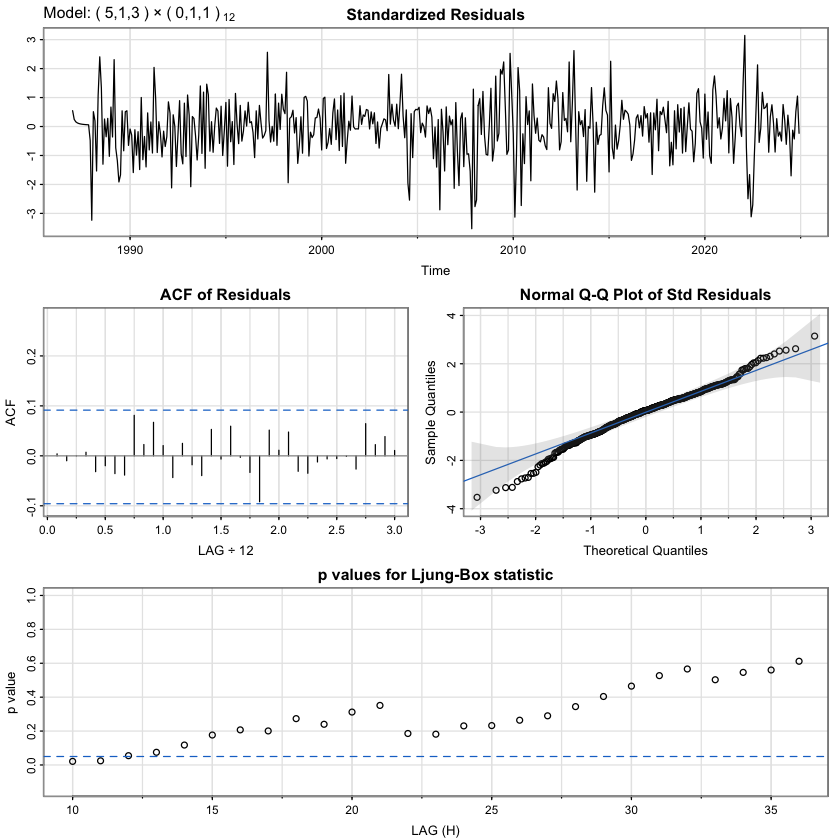

In [17]:
par(bg = "white")
sarima(loglansa,
       p = 5,
       d = 1,
       q = 3,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

ok this model is actually looking good! I will remove the ar5 term since it's not statistically significant.

initial  value -4.471694 
iter   2 value -4.611141
iter   3 value -4.682375
iter   4 value -4.794005
iter   5 value -5.083706
iter   6 value -5.262975
iter   7 value -5.309358
iter   8 value -5.375002
iter   9 value -5.414105
iter  10 value -5.422555
iter  11 value -5.424373
iter  12 value -5.424562
iter  13 value -5.424686
iter  14 value -5.424718
iter  15 value -5.424779
iter  16 value -5.424799
iter  17 value -5.424815
iter  18 value -5.424827
iter  19 value -5.424830
iter  20 value -5.424836
iter  21 value -5.424846
iter  22 value -5.424852
iter  23 value -5.424867
iter  24 value -5.424894
iter  25 value -5.424937
iter  26 value -5.424994
iter  27 value -5.425048
iter  28 value -5.425081
iter  29 value -5.425104
iter  30 value -5.425131
iter  31 value -5.425154
iter  32 value -5.425162
iter  33 value -5.425163
iter  34 value -5.425163
iter  34 value -5.425163
iter  34 value -5.425163
final  value -5.425163 
converged
initial  value -5.427138 
iter   2 value -5.427513
iter   3 value

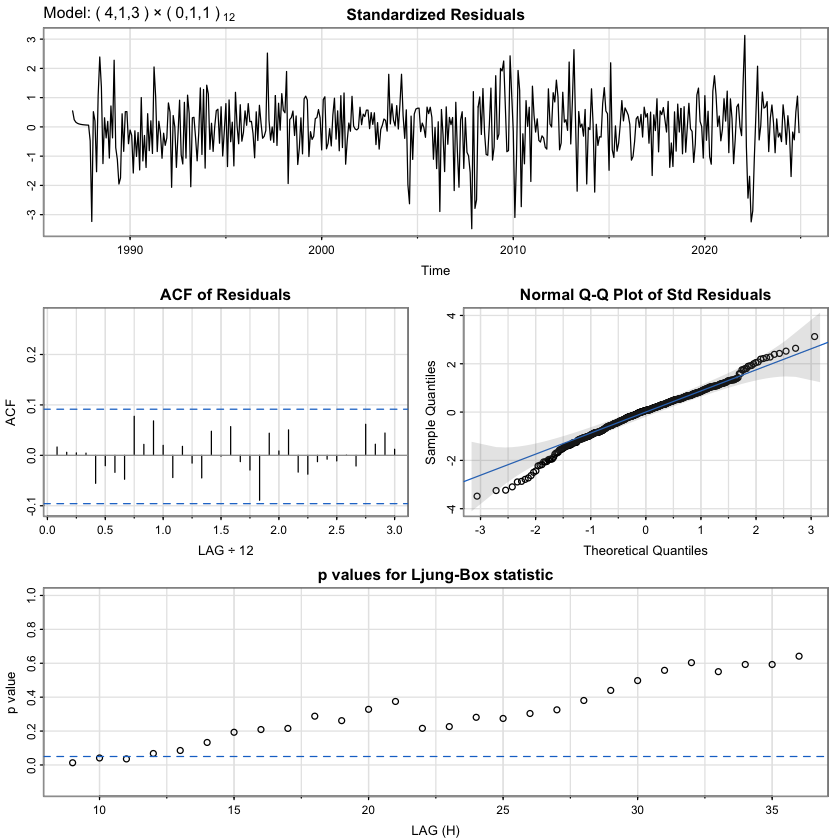

In [18]:
par(bg = "white")
sarima(loglansa,
       p = 4,
       d = 1,
       q = 3,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

initial  value -4.471694 
iter   2 value -4.614544
iter   3 value -4.704966
iter   4 value -4.881601
iter   5 value -5.058326
iter   6 value -5.310740
iter   7 value -5.390281
iter   8 value -5.419447
iter   9 value -5.423247
iter  10 value -5.424983
iter  11 value -5.425576
iter  12 value -5.425723
iter  13 value -5.425746
iter  14 value -5.425771
iter  15 value -5.425849
iter  16 value -5.425886
iter  17 value -5.425918
iter  18 value -5.425950
iter  19 value -5.425973
iter  20 value -5.425980
iter  21 value -5.425981
iter  22 value -5.425982
iter  23 value -5.425985
iter  24 value -5.425991
iter  25 value -5.425998
iter  26 value -5.426004
iter  27 value -5.426008
iter  28 value -5.426012
iter  29 value -5.426016
iter  30 value -5.426025
iter  31 value -5.426044
iter  32 value -5.426092
iter  33 value -5.426208
iter  34 value -5.426299
iter  35 value -5.426365
iter  36 value -5.426414
iter  37 value -5.426536
iter  38 value -5.426797
iter  39 value -5.427048
iter  40 value -5.427450

Warning message in arima(xdata, order = c(p, d, q), seasonal = list(order = c(P, :
“possible convergence problem: optim gave code = 1”


<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE  t.value p.value
ar1   -0.2855 0.1370  -2.0832  0.0378
ar2   -0.0915 0.1506  -0.6072  0.5440
ar3    0.4393 0.0642   6.8471  0.0000
ar4    0.5858 0.1044   5.6135  0.0000
ma1    1.2482 0.1422   8.7778  0.0000
ma2    1.3426 0.1712   7.8442  0.0000
ma3    0.6426 0.1782   3.6063  0.0003
ma4    0.0828 0.0972   0.8516  0.3949
sma1  -0.7771 0.0429 -18.1222  0.0000

sigma^2 estimated as 1.855336e-05 on 434 degrees of freedom 
 
AIC = -7.982772  AICc = -7.981834  BIC = -7.890367 
 


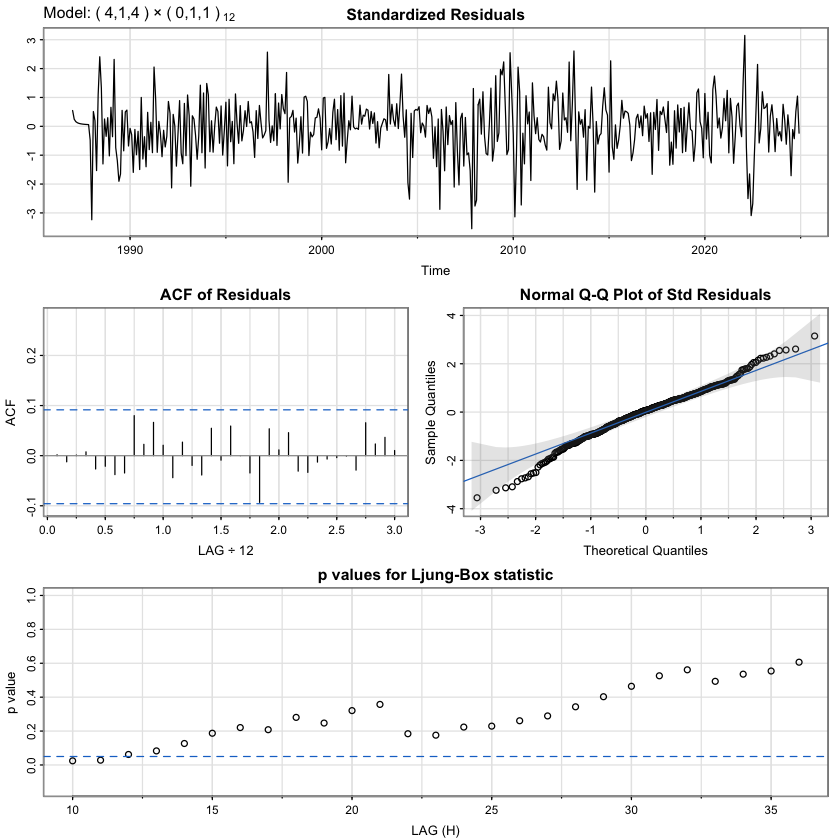

In [19]:
par(bg = "white")
sarima(loglansa,
       p = 4,
       d = 1,
       q = 4,
       P = 0,
       D = 1,
       Q = 1,
       S = 12)

initial  value -4.471694 
iter   2 value -4.627122
iter   3 value -4.793799
iter   4 value -4.921830
iter   5 value -5.093984
iter   6 value -5.331018
iter   7 value -5.395098
iter   8 value -5.402049
iter   9 value -5.419857
iter  10 value -5.421505
iter  11 value -5.424589
iter  12 value -5.424831
iter  13 value -5.424902
iter  14 value -5.425003
iter  15 value -5.425051
iter  16 value -5.425095
iter  17 value -5.425107
iter  18 value -5.425112
iter  19 value -5.425117
iter  20 value -5.425125
iter  21 value -5.425129
iter  22 value -5.425144
iter  23 value -5.425161
iter  24 value -5.425167
iter  25 value -5.425179
iter  26 value -5.425196
iter  27 value -5.425227
iter  28 value -5.425263
iter  29 value -5.425307
iter  30 value -5.425369
iter  31 value -5.425422
iter  32 value -5.425469
iter  33 value -5.425521
iter  34 value -5.425560
iter  35 value -5.425573
iter  36 value -5.425577
iter  37 value -5.425577
iter  37 value -5.425577
iter  37 value -5.425577
final  value -5.425577 


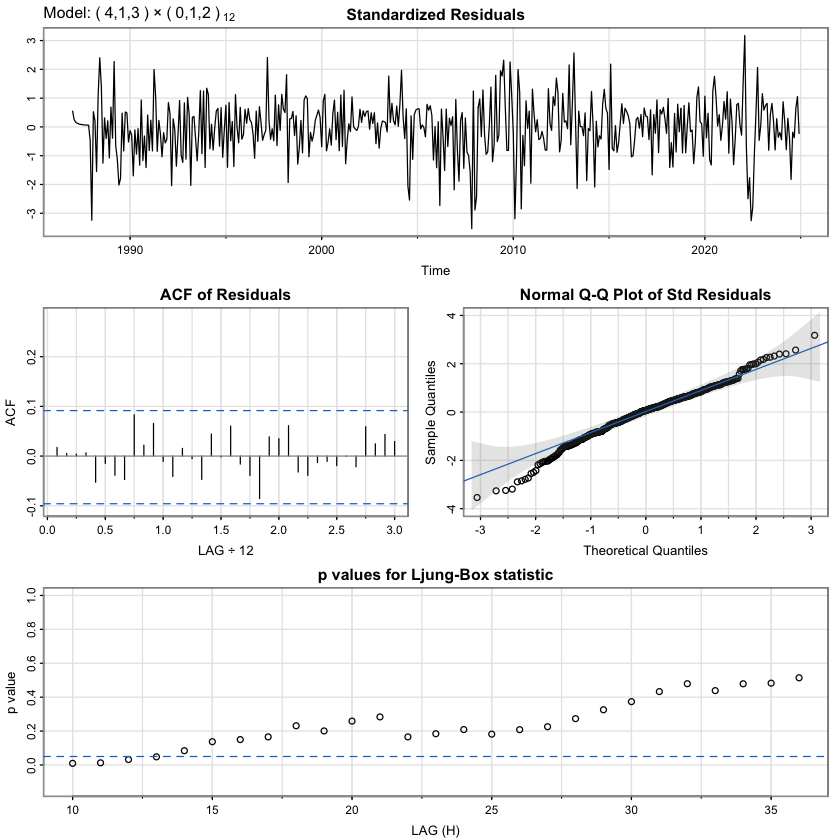

In [20]:
par(bg = "white")
sarima(loglansa,
       p = 4,
       d = 1,
       q = 3,
       P = 0,
       D = 1,
       Q = 2,
       S = 12)

OK so after poking around our best model is clearly (4,1,3)x(0,1,1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2025,6.080404,6.089493,6.104132,6.116362,6.125721,6.130515,6.131048,6.128783,6.126575,6.127939,6.128522,6.128546
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2025,0.004312248,0.009434868,0.015627614,0.021929624,0.028815783,0.036082431,0.043525514,0.051012336,0.058721244,0.066471204,0.074199050,0.081935129


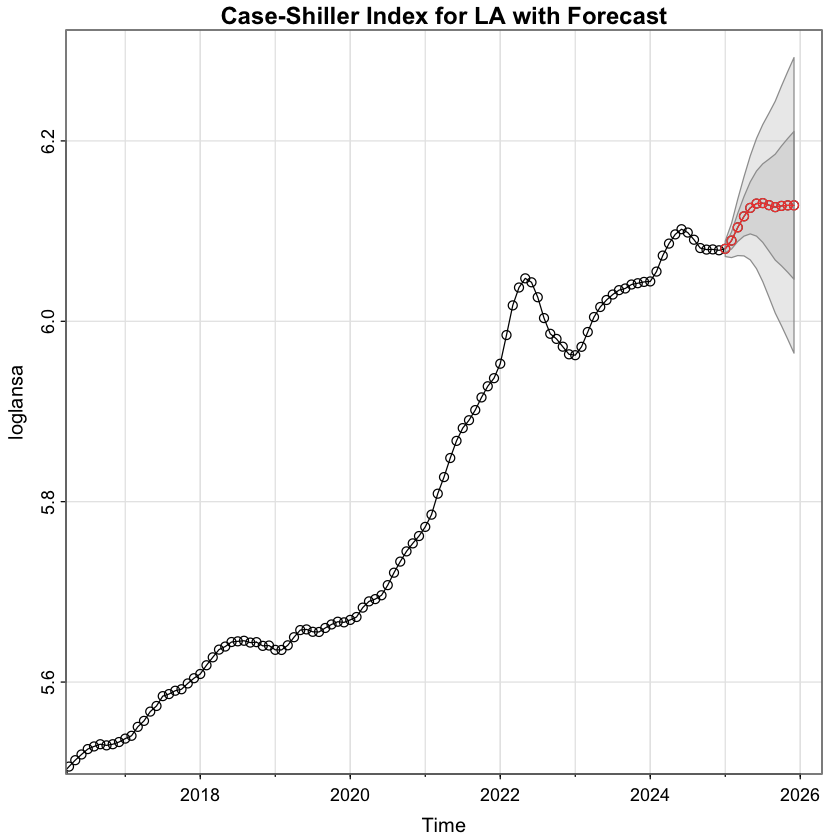

In [33]:
par(bg = "white")
forecast <- sarima.for(loglansa,
           n.ahead = 12,
           p = 4,
           d = 1,
           q = 3,
           P = 0,
           D = 1,
           Q = 1,
           S = 12)

title(main = "Case-Shiller Index for LA with Forecast")
forecast

In [34]:
log_forecast <- forecast$pred
se <- forecast$se

upper_log <- log_forecast + 2 * se
lower_log <- log_forecast - 2 * se

forecast_exp <- exp(log_forecast)
upper_exp <- exp(upper_log)
lower_exp <- exp(lower_log)

months <- month.abb
forecast_df <- data.frame(
  Month = months,
  Forecast_Log = round(as.numeric(log_forecast), 4),
  Std_Error = round(as.numeric(se), 4),
  Forecast_Exp = round(as.numeric(forecast_exp), 2),
  Lower_95_CI = round(as.numeric(lower_exp), 2),
  Upper_95_CI = round(as.numeric(upper_exp), 2)
)

print(forecast_df)

   Month Forecast_Log Std_Error Forecast_Exp Lower_95_CI Upper_95_CI
1    Jan       6.0804    0.0043       437.21      433.45      440.99
2    Feb       6.0895    0.0094       441.20      432.95      449.60
3    Mar       6.1041    0.0156       447.70      433.93      461.92
4    Apr       6.1164    0.0219       453.21      433.76      473.53
5    May       6.1257    0.0288       457.47      431.85      484.61
6    Jun       6.1305    0.0361       459.67      427.67      494.07
7    Jul       6.1310    0.0435       459.92      421.57      501.75
8    Aug       6.1288    0.0510       458.88      414.37      508.17
9    Sep       6.1266    0.0587       457.87      407.13      514.92
10   Oct       6.1279    0.0665       458.49      401.42      523.68
11   Nov       6.1285    0.0742       458.76      395.49      532.15
12   Dec       6.1285    0.0819       458.77      389.43      540.46
